# Preparación del entorno


In [32]:
#Importamos librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, roc_auc_score

In [6]:
#Cargamos el CSV de datos de pacientes

df = pd.read_csv("/content/datos_pacientes_ids.csv")

# Exploracion

In [5]:
# Ver las primeras filas
df.head(5)

,ID,edad,colesterol,presion_arterial,riesgo_cardiovascular
0,id_bgx274,45,193,103,0
1,id_zwr159,51,151,126,0
2,id_cbj288,53,184,113,0
3,id_fmb925,36,191,114,0
4,id_oqq273,58,193,109,0


In [ ]:
# Datos de cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     100 non-null    object
 1   edad                   100 non-null    int64 
 2   colesterol             100 non-null    int64 
 3   presion_arterial       100 non-null    int64 
 4   riesgo_cardiovascular  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


# Limpieza de datos

In [ ]:
#Eliminamos filas con valores nulos
df = df.dropna()

## 1. Análisis exploratorio

Realiza un análisis visual de las distribuciones de las variables cuantitativas
(edad , colesterol , presión_arterial) separadas por los grupos de riesgo (riesgo_cardiovascular ). Puedes usar histogramas, boxplots, o cualquier
herramienta visual que consideres apropiada.

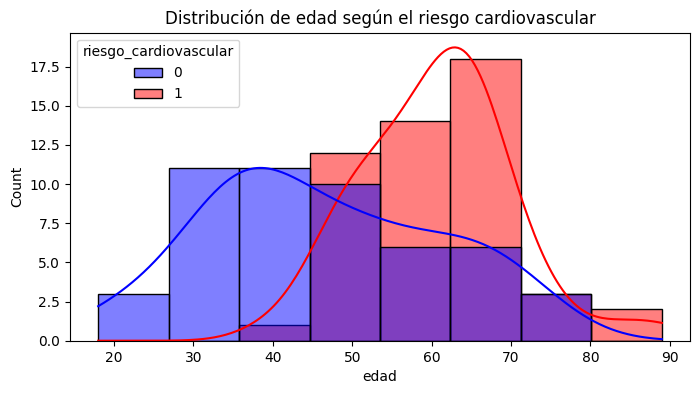

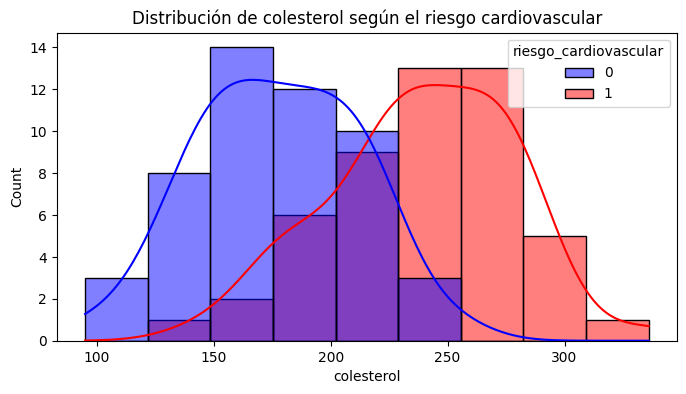

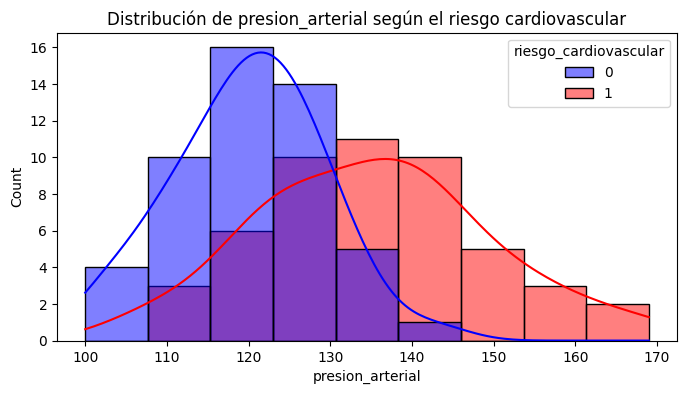

In [ ]:
#En este caso, aislo las variables cuantitativas
variables = ['edad', 'colesterol', 'presion_arterial']

for var in variables:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=var, hue='riesgo_cardiovascular', kde=True, palette={0:'blue', 1:'red'})
    plt.title(f'Distribución de {var} según el riesgo cardiovascular')
    plt.show()


/tmp/ipython-input-105214223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


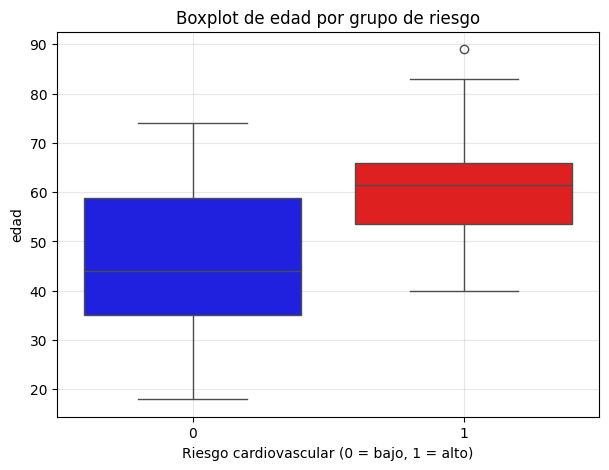

/tmp/ipython-input-105214223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


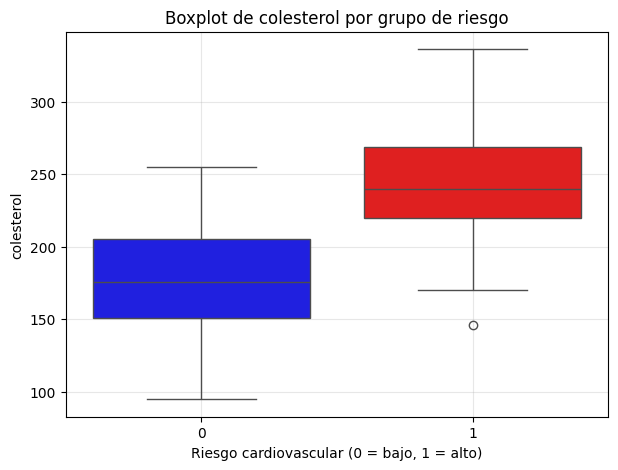

/tmp/ipython-input-105214223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


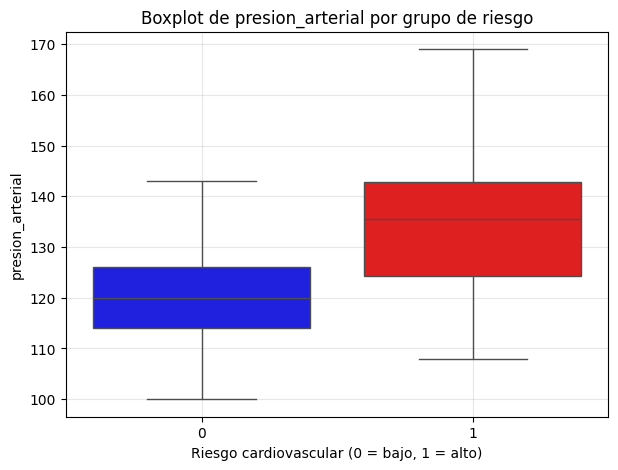

In [8]:
# Aseguramos que la variable de riesgo esté en formato string para el gráfico
df['riesgo_cardiovascular_str'] = df['riesgo_cardiovascular'].astype(str)

# Variables numéricas a comparar
variables = ['edad', 'colesterol', 'presion_arterial']

# Graficamos cada variable
for var in variables:
    plt.figure(figsize=(7,5))

    sns.boxplot(
        data=df,
        x='riesgo_cardiovascular_str',  # usamos la versión string para evitar el bug
        y=var,
        palette={'0':'blue', '1':'red'}
    )

    plt.title(f'Boxplot de {var} por grupo de riesgo')
    plt.xlabel('Riesgo cardiovascular (0 = bajo, 1 = alto)')
    plt.ylabel(var)
    plt.grid(alpha=0.3)
    plt.show()



## 2. Variable predictora

La variable más conveniente para predecir el riesgo cardiovascular es **presión arterial**.

Si bien en *edad* y *colesterol* se observan tendencias, como por ejemplo, valores ligeramente más altos en el grupo de risgo, no son tan discriminativas como en este caso.

En el caso de los histogramas, la presion arterial muestra una separacion más clara ya que se puede apreciar que los pacientes de riesgo alto presentan valores mas concentrados en rangos superiores y con menos mezcla con respecto al grupo de riesgo bajo.

En cuanto a los boxplots, refuerzan esta observación, ya que muestran que la variable elegida presenta la mayor separación entre pacientes de bajo y alto riesgo.

## 3. Propuesta de Umbral (Threshold):

Visualmente, propone un umbral (threshold) para la variable seleccionada que creas adecuado para distinguir entre pacientes de bajo y alto riesgo. Este umbral será utilizado para clasificar los pacientes.

Observando los histogramas y boxplots de presion arterial hechos en un inicio, considero que 130 mmHg es un valor de corte razonable. Por debajo de ese valor predominan pacientes de bajo riesgo mientras que por encima comienzan a aparecer mayormente los de riesgo alto. Elegir un umbral mas bajo aumentaria los galsos positivos y disminuiria la especificidad, mientras que un umbral mas alto reduciria la sensibilidad. Por eso 130 resulta un equilibrio adecuado.

## 4. Modelo de Clasificación con el Umbral Propuesto


 Utiliza el umbral propuesto para clasificar a los pacientes en dos grupos
 (Riesgo = 0 o Riesgo = 1).

 Calcula las siguientes métricas para evaluar el rendimiento del clasificador:
 * Sensibilidad: Proporción de verdaderos positivos sobre el total de positivos.
* Especificidad: Proporción de verdaderos negativos sobre el total de negativos.
* Accuracy: Proporción de clasificaciones correctas sobre el total de casos.
* Balanced Accuracy: Promedio entre la sensibilidad y la especificidad.

In [27]:
#Creamos una funcion de clasificacion (vista en clases)
def prediccion(Umbral, df):
  a = pd.Series([0 if x<=Umbral else 1 for x in df['presion_arterial']])
  return list(a)


In [26]:
Umbral = 130

df["y_pred"] = prediccion(Umbral, df)

vp = len(df[(df['y_pred']==1)&(df['riesgo_cardiovascular']==1)])
vn = len(df[(df['y_pred']==0)&(df['riesgo_cardiovascular']==0)])

fp = len(df[(df['y_pred']==1)&(df['riesgo_cardiovascular']==0)])
fn = len(df[(df['y_pred']==0)&(df['riesgo_cardiovascular']==1)])

sensibilidad = vp/(vp+fn)
especificidad = vn/(vn+fp)
balanced_accuracy = (sensibilidad + especificidad)/2

print("Umbral: ", Umbral)
print("Verdaderos_positivos: ", vp)
print("Verdaderos_negativos: ", vn)
print("Falsos_positivos: ", fp)
print("Falsos_negativo", fn)
print("Sensibilidad: ", sensibilidad)
print("Especificidad: ", especificidad)
print("Balanced Accuracy: ", balanced_accuracy)

Umbral:  130
Verdaderos_positivos:  31
Verdaderos_negativos:  44
Falsos_positivos:  6
Falsos_negativo 19
Sensibilidad:  0.62
Especificidad:  0.88
Balanced Accuracy:  0.75


## 5. Curva ROC y Umbral Óptimo

* Grafica la curva ROC utilizando la variable seleccionada.

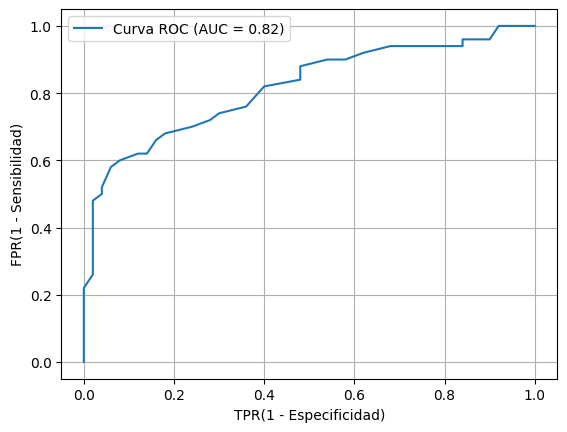

In [35]:
y_true = df['riesgo_cardiovascular'] #datos reales
scores = df['presion_arterial']

#Calculo de AUC
auc_value = roc_auc_score(y_true, scores)

#Calculamos puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, scores)

#Graficamos
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_value:.2f})')
plt.xlabel('TPR(1 - Especificidad)')
plt.ylabel('FPR(1 - Sensibilidad)')
plt.grid()
plt.legend()
plt.show()

* Calcula el área bajo la curva ROC (AUC) y explica para que sirve saberlo.

Un AUC de 0.82 nos señala que si tomamos al azar un paciente de alto riesgo y uno de bajo riesgo hay un 82% de posibilidad de que el paciente de alto riesgo tenga una presion arterial mayor que el de bajo riego. Esto en clasificacion medica es muy bueno.

* Determina el umbral óptimo para la clasificación utilizando la curva ROC.

In [44]:
# Índice de Youden
youden_index = np.argmax(tpr - fpr)
print("Índice del mejor threshold:", youden_index)

# Umbral óptimo
threshold_optimo = thresholds[youden_index]
print("Umbral óptimo:", threshold_optimo)


Índice del mejor threshold: 13
Umbral óptimo: 134.0


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

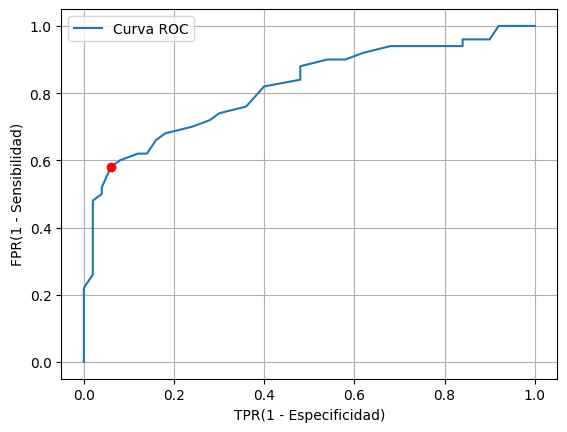

In [47]:
threshold_optimo = thresholds[youden_index]
fpr_optimo = fpr[youden_index]
tpr_optimo = tpr[youden_index]


plt.plot(fpr, tpr, label=f'Curva ROC')
plt.xlabel('TPR(1 - Especificidad)')
plt.ylabel('FPR(1 - Sensibilidad)')
plt.grid()
plt.legend()
plt.plot(fpr_optimo, tpr_optimo, 'ro',label=f'Punto Optimo (Umbral')
plt

 * Utiliza este nuevo umbral para realizar una nueva clasificación y vuelve a calcular las métricas de rendimiento: Sensibilidad, Especificidad, Accuracy, Balanced Accuracy

In [52]:
Umbral_opt = 135

df["y_pred_opt"] = [1 if x > Umbral_opt else 0 for x in df['presion_arterial']]

vp_opt = len(df[(df['y_pred_opt']==1)&(df['riesgo_cardiovascular']==1)])
vn_opt = len(df[(df['y_pred_opt']==0)&(df['riesgo_cardiovascular']==0)])
fp_opt = len(df[(df['y_pred_opt']==1)&(df['riesgo_cardiovascular']==0)])
fn_opt = len(df[(df['y_pred_opt']==0)&(df['riesgo_cardiovascular']==1)])

sensibilidad_opt = vp_opt / (vp_opt + fn_opt)
especificidad_opt = vn_opt / (vn_opt + fp_opt)
accuracy_opt = (vp_opt + vn_opt) / (vp_opt + vn_opt + fp_opt + fn_opt)
balanced_opt = (sensibilidad_opt + especificidad_opt) / 2

print("Umbral óptimo:", Umbral_opt)
print("Sensibilidad:", sensibilidad_opt)
print("Especificidad:", especificidad_opt)
print("Accuracy:", accuracy_opt)
print("Balanced Accuracy:", balanced_opt)


Umbral óptimo: 135
Sensibilidad: 0.5
Especificidad: 0.96
Accuracy: 0.73
Balanced Accuracy: 0.73
